In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [75]:
df = pd.read_csv('./data/hcvdat0.csv', index_col=0)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df

,category,age,sex,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [76]:
# according ot the dataset documentation, column 0 is the patient id

In [77]:
# two categorical values: category (which is the target variable) and sex

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1 to 615
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  615 non-null    object 
 1   age       615 non-null    int64  
 2   sex       615 non-null    object 
 3   alb       614 non-null    float64
 4   alp       597 non-null    float64
 5   alt       614 non-null    float64
 6   ast       615 non-null    float64
 7   bil       615 non-null    float64
 8   che       615 non-null    float64
 9   chol      605 non-null    float64
 10  crea      615 non-null    float64
 11  ggt       615 non-null    float64
 12  prot      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 67.3+ KB


In [79]:
# let's see the outcome distribution in this dataset
df.category.value_counts()

category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [80]:
df.describe().round()

,age,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
count,615.0,614.0,597.0,614.0,615.0,615.0,615.0,605.0,615.0,615.0,614.0
mean,47.0,42.0,68.0,28.0,35.0,11.0,8.0,5.0,81.0,40.0,72.0
std,10.0,6.0,26.0,25.0,33.0,20.0,2.0,1.0,50.0,55.0,5.0
min,19.0,15.0,11.0,1.0,11.0,1.0,1.0,1.0,8.0,4.0,45.0
25%,39.0,39.0,52.0,16.0,22.0,5.0,7.0,5.0,67.0,16.0,69.0
50%,47.0,42.0,66.0,23.0,26.0,7.0,8.0,5.0,77.0,23.0,72.0
75%,54.0,45.0,80.0,33.0,33.0,11.0,10.0,6.0,88.0,40.0,75.0
max,77.0,82.0,417.0,325.0,324.0,254.0,16.0,10.0,1079.0,651.0,90.0


In [81]:
# from the describe function, there don't seem to be any "crazy" values (too large, too small).

In [82]:
# find null values
df.isnull().sum()

category     0
age          0
sex          0
alb          1
alp         18
alt          1
ast          0
bil          0
che          0
chol        10
crea         0
ggt          0
prot         1
dtype: int64

In [83]:
# we will fill these null values with the average value. Placing a zero value makes no sense 
df.fillna(df.mean(numeric_only=True), inplace=True)
df

,category,age,sex,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
1,0=Blood Donor,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3=Cirrhosis,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3=Cirrhosis,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3=Cirrhosis,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3=Cirrhosis,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [84]:
# show all categories and place them in dictionary
categs=df.category.unique()
categs

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [85]:
# let's create a dictionary to hold these values. Also, replace all of the existing values with only their code
patient_category={}

for c in categs:
    if c.split("=")[0]=="0s":
        patient_category[4]=c.split("=")[1]
        df.replace(c, 4, inplace=True)
    else:
        patient_category[int(c.split("=")[0])]=c.split("=")[1]
        df.replace(c, c.split("=")[0], inplace=True)
    
patient_category


{0: 'Blood Donor',
 4: 'suspect Blood Donor',
 1: 'Hepatitis',
 2: 'Fibrosis',
 3: 'Cirrhosis'}

In [86]:
df

,category,age,sex,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
1,0,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,3,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
612,3,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
613,3,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
614,3,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [87]:
category

{'0': 'Blood Donor',
 '0s': 'suspect Blood Donor',
 '1': 'Hepatitis',
 '2': 'Fibrosis',
 '3': 'Cirrhosis'}

category
0    533
3     30
1     24
2     21
4      7
Name: count, dtype: int64

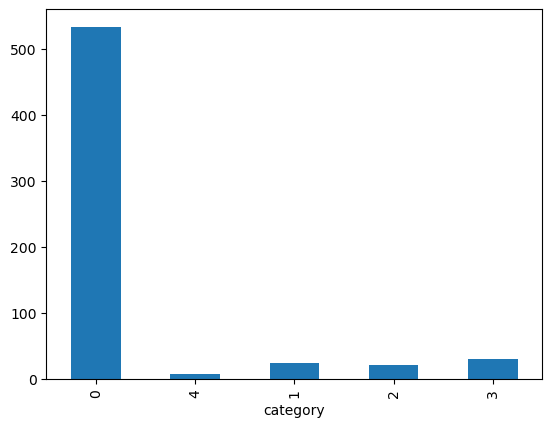

In [88]:
# let's do some EDA.
# From the data, let's see how many  men vs women have cirrhosis and how many have fibrosis

df.category.value_counts(sort=False).plot.bar()
df.category.value_counts()

In [89]:
from sklearn.model_selection import train_test_split


In [90]:
# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1.
# reset indexes and delete target variable ("category") from original dataset

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.category.values
y_val = df_val.category.values
y_test = df_test.category.values

del df_train['category']
del df_val['category']
del df_test['category']

df_val

,age,sex,alb,alp,alt,ast,bil,che,chol,crea,ggt,prot
0,46,m,35.0,109.6,2.3,19.2,11.0,7.10,4.100000,1079.1,105.6,69.1
1,59,m,27.0,73.8,4.0,65.2,209.0,2.47,3.610000,71.7,28.5,60.6
2,62,f,44.0,46.6,24.8,25.5,7.6,6.75,4.590000,91.0,39.5,74.3
3,76,m,29.2,48.9,25.2,27.2,8.3,4.52,2.790000,127.0,18.3,58.1
4,46,f,42.9,55.1,15.2,29.8,3.6,8.37,5.368099,61.0,29.0,71.9
...,...,...,...,...,...,...,...,...,...,...,...,...
118,40,m,44.5,45.7,25.9,27.6,9.2,8.93,4.490000,87.0,17.0,71.2
119,56,m,42.9,50.0,20.4,22.1,5.4,7.28,5.370000,90.0,34.6,76.0
120,56,m,37.9,49.2,16.6,15.7,3.7,9.90,5.300000,95.0,20.8,67.1
121,42,m,38.1,88.7,46.7,37.0,12.5,7.26,6.760000,54.0,18.4,72.1


In [91]:
from sklearn.feature_extraction import DictVectorizer

In [92]:
#Use DictVectorizer(sparse=True) to turn the dataframes into matrices.
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [93]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [94]:
import xgboost as xgb

In [95]:
dt = DecisionTreeRegressor(max_depth=1)   #  max_depth= tree's maximum tree depth
dt.fit(X_train, y_train)

NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
print(export_text(dt, feature_names=dv.feature_names_))